In [1]:
import numpy as np
from scipy.linalg import expm
from control import *
import matplotlib.pyplot as plt

r_1 = 2e3
c_1 = 1e-6
r_2 = 1e3
c_2 = 1e-6

s = tf('s')
hs_1 = 1 / ((r_1*c_1*r_2*c_2)*s*s + (r_1*c_1+r_1*c_2+r_2*c_2)*s + 1)
num_1, den_1 = tfdata(hs_1)
num_1, den_1

num_2 = np.array([1])
den_2 = np.array([(r_1*c_1*r_2*c_2), (r_1*c_1+r_1*c_2+r_2*c_2), 1])
hs_2 = tf(num_2, den_2)
hs_2

TransferFunction(array([1]), array([2.e-06, 5.e-03, 1.e+00]))

Para realizar pole placement en la planta, primero debemos obtener la matriz de estado de la planta. Podemos obtener la matriz de estado A y la matriz de entrada B utilizando la función ss:

In [2]:
sys = ss(hs_2)
A, B, _, _ = sys.A, sys.B, sys.C, sys.D

Aquí, estamos creando un sistema de espacio de estado utilizando la función ss a partir de la función de transferencia hs_1. Luego, estamos extrayendo las matrices de estado A y B del sistema de espacio de estado.

Podemos construir la matriz de salida C como:

In [3]:
C = np.array([0, 1])

Aquí, estamos construyendo una matriz de una sola fila, donde la segunda columna es 1 para representar que la salida es la segunda variable de estado de la matriz de estado A.

Ahora podemos realizar el pole placement utilizando la función place:

In [4]:
p = [-1, -2]
K = place(A, B, p)
K


array([[  -2497., -499998.]])

Aquí, estamos especificando los polos deseados p y calculando la matriz de realimentación de estado K utilizando la función place.

Podemos crear el sistema de control utilizando la función ss y la matriz de realimentación de estado K:

In [5]:
sys_cl = ss(A - B @ K, B, C, 0)
print(K)
print(sys_cl)

[[  -2497. -499998.]]
<LinearIOSystem>: sys[14]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[-3. -2.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[0. 1.]]

D = [[0.]]



Aquí, estamos creando un sistema de control de retroalimentación de estado con la matriz de estado A - B @ K, la matriz de entrada B, la matriz de salida C y una ganancia de entrada nula.

Finalmente, podemos simular la respuesta del sistema de control utilizando la función step y graficar los resultados:

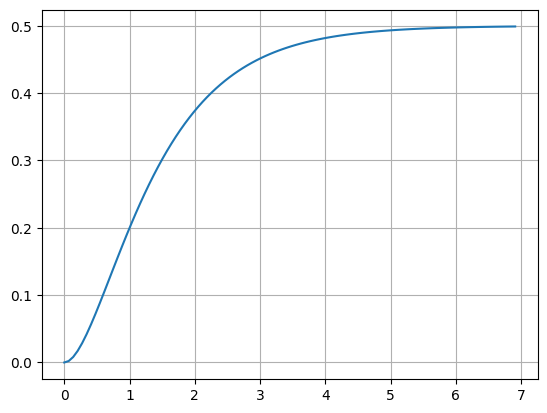

In [6]:
t, y = step_response(sys_cl)
plt.plot(t, y)
plt.grid()
plt.show()